The website talking about how the dark matter affects the CMB.
https://background.uchicago.edu/~whu/intermediate/driving2.html


### **Understanding the Multipole Moment (ℓ) in CMB Analysis**
The **multipole moment (ℓ)** is a crucial parameter in cosmology, particularly in the study of the **Cosmic Microwave Background (CMB) power spectrum**. It represents the **angular scale** of temperature fluctuations in the CMB.

---

### **1. What Does the Multipole Moment Represent?**
- The CMB temperature anisotropies are observed as **small fluctuations in the sky**.
- These fluctuations can be decomposed using **spherical harmonics**, which are mathematical functions used to describe patterns on a sphere (like Earth or the cosmic sky).
- Each **multipole moment ℓ** corresponds to a specific **angular scale** in the sky:
  \[
  \theta \approx \frac{180^\circ}{\ell}
  \]
  where:
  - **θ** is the angular size in degrees.
  - **ℓ** is the multipole moment.

---

### **2. How ℓ Relates to Angular Scales**
- **Small ℓ values (ℓ ≈ 2 – 100)** → Represent **large angular scales** (degrees across the sky), corresponding to the largest structures.
- **Medium ℓ values (ℓ ≈ 100 – 1000)** → Correspond to **smaller scales**, including acoustic peaks in the CMB.
- **High ℓ values (ℓ > 1000)** → Represent **very small angular scales**, associated with finer fluctuations.

📌 **Example Interpretation**:
- **ℓ ≈ 2** → Represents fluctuations across the entire sky (~90° scales).
- **ℓ ≈ 200** → Represents structures of ~1° scale (corresponding to the first acoustic peak in the CMB).
- **ℓ ≈ 1000** → Represents structures of ~0.1° scale.

---

### **3. Why Is the Multipole Moment Important?**
The **CMB power spectrum (ΔT vs. ℓ)** reveals critical information about the **composition and evolution of the universe**:
- **First peak (ℓ ≈ 200)**: Tells us about the total matter content.
- **Second peak (ℓ ≈ 500)**: Indicates the balance of baryonic (ordinary) matter.
- **Third peak and beyond (ℓ > 1000)**: Provides insights into dark matter and cosmic inflation.

---


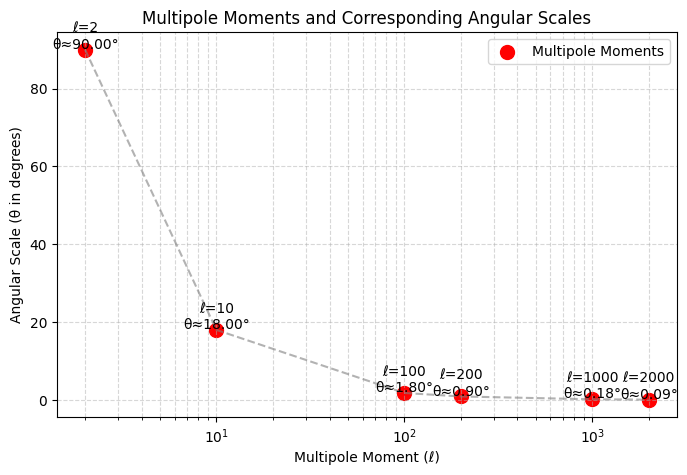

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the multipole moments and their corresponding angular scales
ell_values = np.array([2, 10, 100, 200, 1000, 2000])
angular_scales = 180 / ell_values  # Approximate angular scale in degrees

# Create a visualization
plt.figure(figsize=(8, 5))
plt.scatter(ell_values, angular_scales, color='red', s=100, label="Multipole Moments")
plt.plot(ell_values, angular_scales, linestyle='--', color='gray', alpha=0.6)

# Annotate points
for ell, scale in zip(ell_values, angular_scales):
    plt.text(ell, scale + 0.3, f'ℓ={ell}\nθ≈{scale:.2f}°', ha='center', fontsize=10)

# Labels and title
plt.xscale('log')
plt.xlabel("Multipole Moment (ℓ)")
plt.ylabel("Angular Scale (θ in degrees)")
plt.title("Multipole Moments and Corresponding Angular Scales")
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.legend()
plt.show()


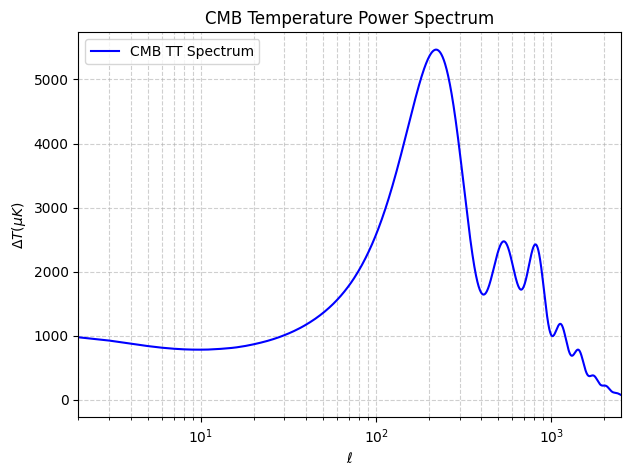

In [2]:
import camb
import numpy as np
import matplotlib.pyplot as plt

# Set up cosmological parameters (Planck 2018 best-fit model)
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.4, ombh2=0.0224, omch2=0.120, tau=0.054)
pars.InitPower.set_params(ns=0.965)

# Compute the CMB power spectrum
pars.set_for_lmax(2500, lens_potential_accuracy=0)
results = camb.get_results(pars)
powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')

# Extract the temperature (TT) spectrum
ell = np.arange(powers['total'].shape[0])  # Multipole moments
TT_spectrum = powers['total'][:, 0]  # Temperature power spectrum (ΔT in μK)

# Plot the CMB temperature power spectrum
plt.figure(figsize=(7,5))
plt.plot(ell, TT_spectrum, color='blue', label='CMB TT Spectrum')
plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.xlim(2, 2500)
plt.ylabel(r'$\Delta T (\mu K)$')
plt.title("CMB Temperature Power Spectrum")
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.show()


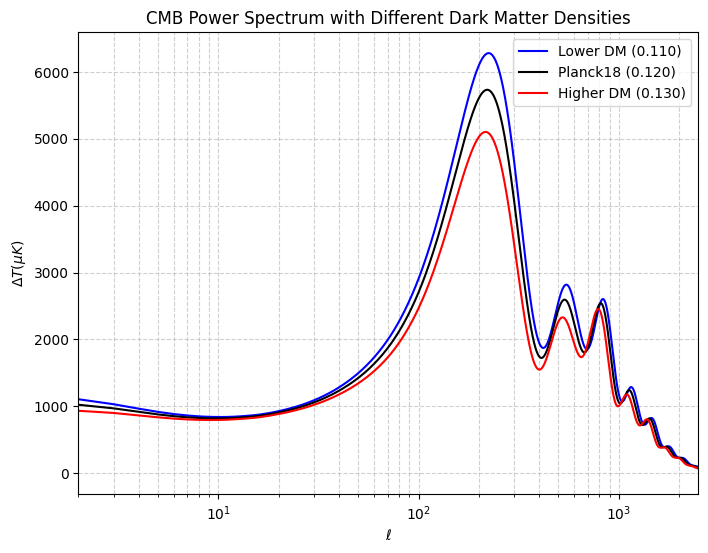

In [ ]:
import camb
import numpy as np
import matplotlib.pyplot as plt

# Function to compute CMB power spectrum given dark matter density
def get_cmb_spectrum(omch2):
    pars = camb.CAMBparams()
    # Updated to best-fitting Planck 2018 cosmology parameters
    pars.set_cosmology(H0=67.36, ombh2=0.02237, omch2=omch2, tau=0.0544)
    pars.InitPower.set_params(ns=0.9649, As=2.1e-9)
    pars.set_for_lmax(2500, lens_potential_accuracy=0)
    results = camb.get_results(pars)
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    ell = np.arange(powers['total'].shape[0])  # Multipole moments
    TT_spectrum = powers['total'][:, 0]  # Temperature power spectrum (ΔT in μK)
    return ell, TT_spectrum

# Actual CMB spectrum (Planck 2018 best-fit parameters)
ell_actual, TT_actual = get_cmb_spectrum(0.1200)

# Simulated spectra with different dark matter densities
dark_matter_values = [0.100, 0.120, 0.150]  # Different omch2 values
colors = ['blue', 'black', 'red']
labels = ['Lower DM (0.110)', 'Planck18 (0.120)', 'Higher DM (0.130)']

plt.figure(figsize=(8,6))

# # Plot actual CMB
# plt.plot(ell_actual, TT_actual, color='black', linestyle='--', label='Actual CMB (Planck18)')

# Plot simulated CMB spectra
for omch2, color, label in zip(dark_matter_values, colors, labels):
    ell, TT = get_cmb_spectrum(omch2)
    plt.plot(ell, TT, color=color, label=label)

# # Annotate key peaks (First, Second, and Third)
# peak_positions = [200, 550, 800]  # Approximate ell values for peaks
# peak_labels = ['1st Peak (Ωm)', '2nd Peak (Ωb)', '3rd Peak (Ωc)']
# for pos, label in zip(peak_positions, peak_labels):
#     peak_index = np.argmin(np.abs(ell_actual - pos))
#     plt.annotate(label, xy=(ell_actual[peak_index], TT_actual[peak_index]), 
#                  xytext=(ell_actual[peak_index], TT_actual[peak_index] + 10),
#                  arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)

plt.xscale('log')
plt.xlabel(r'$\ell$')
plt.xlim(2, 2500)
plt.ylabel(r'$\Delta T (\mu K)$', color='black')
plt.title("CMB Power Spectrum with Different Dark Matter Densities")
plt.grid(True, which='both', linestyle='--', alpha=0.6)
plt.legend()
plt.show()


### The First Peak of the CMB
The **first acoustic peak** in the Cosmic Microwave Background (CMB) power spectrum provides a direct measurement of the **total matter content** (both **dark matter** and **baryonic matter**) in the universe. Here’s why:

---

### **1. Understanding the CMB Peaks**
The peaks in the CMB power spectrum arise from the **acoustic oscillations** of the primordial plasma (a mixture of photons, baryons, and dark matter) before **recombination** (when the universe became neutral and photons could travel freely). 

- The **first peak** corresponds to the **largest-scale compression** of these oscillations.
- The **second peak** corresponds to the **first rarefaction** (expansion).
- The **third and higher peaks** reflect additional oscillations.

Each peak provides insights into different physical components of the universe.

---

### **2. The First Peak and Total Matter Density (Ωm)**
The **first peak** is determined by the **competition between gravity and radiation pressure** in the early universe:

#### **(A) Gravity (Dominated by Total Matter - Ωm)**
- The total amount of **matter (Ωm = Ωb + Ωc)** affects how strongly the primordial plasma **collapses under gravity**.
- **Higher matter density (Ωm ↑)** → **Stronger gravitational pull** → **Larger compressions** → **Higher first peak amplitude**.
- **Lower matter density (Ωm ↓)** → **Weaker gravitational pull** → **Smaller compressions** → **Lower first peak amplitude**.

#### **(B) Photon Pressure (Opposing Gravity)**
- **Photons resist gravitational collapse** by exerting outward pressure (photon-baryon fluid oscillations).
- This **push-and-pull** between **gravity and radiation pressure** sets the height and position of the first peak.

Thus, the **height of the first peak** is a direct probe of the **total matter density (Ωm)**.

---

### **3. How Different Matter Components Affect the First Peak**
- **Baryonic Matter (Ωb)**: Affects all peaks but is more dominant in later peaks.
- **Dark Matter (Ωc)**: Dominates gravitational collapse and influences the **first peak strongly**.
- **Total Matter (Ωm = Ωb + Ωc)**: Controls the **overall depth of gravitational wells** in which the oscillations occur.

By comparing the **observed first peak amplitude** to theoretical models with different **Ωm**, we can determine the **total matter content of the universe**.

---

### **4. Observational Evidence**
- The **Planck 2018 results** measure the first peak’s amplitude and position precisely.
- These observations suggest **Ωm ≈ 0.315**, consistent with a universe composed of **~30% total matter (dark + baryonic) and ~70% dark energy**.


### **The Second Peak of the CMB **

The **second acoustic peak** in the **CMB power spectrum** provides critical information about the **baryonic matter content (Ωb)** of the universe. Here’s why:

---

### **1. Understanding the Second Peak in the CMB**
The **peaks in the CMB power spectrum** arise from **acoustic oscillations** in the primordial photon-baryon plasma before **recombination**. These oscillations are caused by the interplay between:
- **Gravity (pulling matter inward)**
- **Photon pressure (pushing outward)**

Each peak represents different stages of these oscillations.

- **The first peak** corresponds to the **maximum compression** of the plasma under gravity.
- **The second peak** corresponds to the **first expansion** phase after compression.

---

### **2. How Baryonic Matter (Ωb) Affects the Second Peak**
Baryonic matter (protons and neutrons) plays a crucial role in determining the **height ratio of the first and second peaks**:

#### **(A) Gravitational Damping from More Baryons**
- More baryonic matter (**Ωb ↑**) makes the plasma **denser**, increasing its **inertia**.
- This **inertia resists expansion**, making it harder for the plasma to "rebound" after compression.
- As a result, the **second peak gets suppressed (lower amplitude)**.

#### **(B) Effect of Lower Baryonic Matter**
- If **Ωb is lower**, there is **less inertia**, allowing the plasma to expand more freely.
- This **raises the second peak’s amplitude**, making it **higher relative to the first peak**.

Thus, the **relative height of the first and second peaks** gives us a direct measurement of the **baryon density Ωb**.

---

### **3. How Observations Confirm Baryon Content**
- **Planck 2018 observations** precisely measure the second peak.
- Comparing the **first-to-second peak height ratio** with theoretical models shows that **Ωb ≈ 0.049** (about **5% of the total universe** is baryonic matter).
- If we artificially change Ωb in simulations, we can see how it **suppresses or enhances the second peak**.

---


### **5. Summary**
- **First Peak** → Determines **total matter (Ωm = Ωb + Ωc)**
- **Second Peak** → Determines **baryonic matter (Ωb)**
- More **Ωb** → **Lower second peak**
- Less **Ωb** → **Higher second peak**


### **The Third Peak of the CMB**
The **third acoustic peak** in the **CMB power spectrum** is particularly sensitive to the amount of **dark matter (Ωc)** in the universe. Here's why:

---

### **1. Role of Dark Matter in CMB Acoustic Oscillations**
Before recombination (when photons decoupled from matter), the universe was filled with a **hot plasma** of **baryons (normal matter), photons, and dark matter**. This plasma underwent **acoustic oscillations**, forming the **peaks and troughs** seen in the CMB power spectrum.

Dark matter influences these oscillations in two main ways:

1. **Gravitational Pull of Dark Matter**  
   - Dark matter acts as a **gravitational anchor** for the photon-baryon fluid.
   - More dark matter (**Ωc↑**) → **Stronger gravitational wells** → **More compression of baryons into potential wells**.

2. **Enhancing Odd Peaks (Compression) & Suppressing Even Peaks (Expansion)**  
   - The **odd peaks (1st, 3rd, etc.)** correspond to **compression** in gravitational wells.
   - The **even peaks (2nd, 4th, etc.)** correspond to **expansion** against photon pressure.

Thus, **more dark matter (Ωc)** makes the **third peak** **higher**, while **less dark matter** makes it lower.

---

### **2. How the Third Peak Relates to Dark Matter**
- The third peak is a **compression peak**, meaning it depends on **how strongly matter collapsed under gravity**.
- **If there is more dark matter (Ωc↑)**, it **increases the height of the third peak** because dark matter provides extra gravitational pull.
- **If there is less dark matter (Ωc↓)**, the third peak is **lower** because there isn’t enough gravity to enhance compression.

Thus, the **height of the third peak** tells us **how much dark matter is present** in the universe.

---

### **3. Observational Evidence**
- The **Planck 2018 data** shows that the **third peak is significantly higher than the second**, indicating the presence of **cold dark matter**.
- By comparing the **third peak height** in theoretical models with different Ωc values, scientists determined that **Ωc ≈ 0.265 (26.5% of the universe)**.
- If there were no dark matter, the **third peak would be much lower than observed**.

---
